# Assignment - Decision Trees and Random Forests

![](https://i.imgur.com/3sw1fY9.jpg)

In this assignment, you'll continue building on the previous assignment to predict the price of a house using information like its location, area, no. of rooms etc. You'll use the dataset from the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition on [Kaggle](https://kaggle.com). 

We'll follow a step-by-step process:

1. Download and prepare the dataset for training
2. Train, evaluate and interpret a decision tree
3. Train, evaluate and interpret a random forest
4. Tune hyperparameters to improve the model
5. Make predictions and save the model

As you go through this notebook, you will find a **???** in certain places. Your job is to replace the **???** with appropriate code or values, to ensure that the notebook runs properly end-to-end and your machine learning model is trained properly without errors. 

**Guidelines**

1. Make sure to run all the code cells in order. Otherwise, you may get errors like `NameError` for undefined variables.
2. Do not change variable names, delete cells, or disturb other existing code. It may cause problems during evaluation.
3. In some cases, you may need to add some code cells or new statements before or after the line of code containing the **???**. 
4. Since you'll be using a temporary online service for code execution, save your work by running `jovian.commit` at regular intervals.
5. Review the "Evaluation Criteria" for the assignment carefully and make sure your submission meets all the criteria.
6. Questions marked **(Optional)** will not be considered for evaluation and can be skipped. They are for your learning.
7. It's okay to ask for help & discuss ideas on the [community forum](https://jovian.ai/forum/c/zero-to-gbms/gbms-assignment-2/99), but please don't post full working code, to give everyone an opportunity to solve the assignment on their own.


**Important Links**:

- Make a submission here: https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/assignment-2-decision-trees-and-random-forests
- Ask questions, discuss ideas and get help here: https://jovian.ai/forum/c/zero-to-gbms/gbms-assignment-2/99
- Review this Jupyter notebook: https://jovian.ai/aakashns/sklearn-decision-trees-random-forests


## How to Run the Code and Save Your Work

**Option 1: Running using free online resources (1-click, recommended):** The easiest way to start executing the code is to click the **Run** button at the top of this page and select **Run on Binder**. This will set up a cloud-based Jupyter notebook server and allow you to modify/execute the code.


**Option 2: Running on your computer locally:** To run the code on your computer locally, you'll need to set up [Python](https://www.python.org), download the notebook and install the required libraries. Click the **Run** button at the top of this page, select the **Run Locally** option, and follow the instructions.

**Saving your work**: You can save a snapshot of the assignment to your [Jovian](https://jovian.ai) profile, so that you can access it later and continue your work. Keep saving your work by running `jovian.commit` from time to time.

In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
jovian.commit(project='python-random-forests-assignment', privacy='secret')

<IPython.core.display.Javascript object>

[jovian] Creating a new project "sahilfaizal/python-random-forests-assignment"
[jovian] Committed successfully! https://jovian.ai/sahilfaizal/python-random-forests-assignment


'https://jovian.ai/sahilfaizal/python-random-forests-assignment'

Let's begin by installing the required libraries.

In [4]:
!pip install opendatasets scikit-learn plotly folium --upgrade --quiet

In [5]:
!pip install pandas numpy matplotlib seaborn --quiet

## Download and prepare the dataset for training

In [6]:
import os
from zipfile import ZipFile
from urllib.request import urlretrieve

dataset_url = 'https://github.com/JovianML/opendatasets/raw/master/data/house-prices-advanced-regression-techniques.zip'
urlretrieve(dataset_url, 'house-prices.zip')
with ZipFile('house-prices.zip') as f:
    f.extractall(path='house-prices')
    
os.listdir('house-prices')

['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']

In [7]:
import pandas as pd
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

prices_df = pd.read_csv('house-prices/train.csv')
prices_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [8]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Identify input and target columns
input_cols, target_col = prices_df.columns[1:-1], prices_df.columns[-1]
inputs_df, targets = prices_df[input_cols].copy(), prices_df[target_col].copy()

# Identify numeric and categorical columns
numeric_cols = prices_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = prices_df[input_cols].select_dtypes(include='object').columns.tolist()

# Impute and scale numeric columns
imputer = SimpleImputer().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])
scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

# Create training and validation sets
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)

Let's save our work before continuing.

In [9]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sahilfaizal/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sahilfaizal/python-random-forests-assignment


'https://jovian.ai/sahilfaizal/python-random-forests-assignment'

## Decision Tree


> **QUESTION 1**: Train a decision tree regressor using the training set.

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
# Create the model
tree = DecisionTreeRegressor(random_state=42,criterion='mse')

In [12]:
# Fit the model to the training data
tree.fit(train_inputs,train_targets)

DecisionTreeRegressor(random_state=42)

In [13]:
tree.max_features_

304

In [14]:
tree.tree_.max_depth

20

Let's save our work before continuing.

In [15]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sahilfaizal/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sahilfaizal/python-random-forests-assignment


'https://jovian.ai/sahilfaizal/python-random-forests-assignment'

> **QUESTION 2**: Generate predictions on the training and validation sets using the trained decision tree, and compute the RMSE loss.

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
tree_train_preds = tree.predict(train_inputs)

In [18]:
tree_train_rmse = mean_squared_error(train_targets,tree_train_preds,squared=False)

In [19]:
tree_val_preds = tree.predict(val_inputs)

In [20]:
tree_val_rmse = mean_squared_error(val_targets,tree_val_preds,squared=False)

In [21]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 0.0, Validation RMSE: 37802.872039112044


Now the question arises why the RMSE for train model is 0 and for the validation model is 37.8K so here the tree model has totally learned the train data and hence when it apply to validation the model forces teh prediction in teh sam emanner as it applies to training set hence failed to make accuracy that much in validation set.

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy_train=accuracy_score(train_targets,tree_train_preds)

In [24]:
accuracy_val=accuracy_score(val_targets,tree_val_preds)

In [25]:
print(' The accuracy for training set by tree is {:.4f}% and \n for validation set is {:.4f}%'.format(accuracy_train*100,accuracy_val*100))

 The accuracy for training set by tree is 100.0000% and 
 for validation set is 0.2740%


**Interpretation**
- This weird result shows that our model fits the training set very well but fail to fit the validation set very poor and hence we can say that our model is higly overfit.

Let's save our work before continuing.

In [26]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sahilfaizal/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sahilfaizal/python-random-forests-assignment


'https://jovian.ai/sahilfaizal/python-random-forests-assignment'

> **QUESTION 3**: Visualize the decision tree (graphically and textually) and display feature importances as a graph. Limit the maximum depth of graphical visualization to 3 levels.

In [27]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

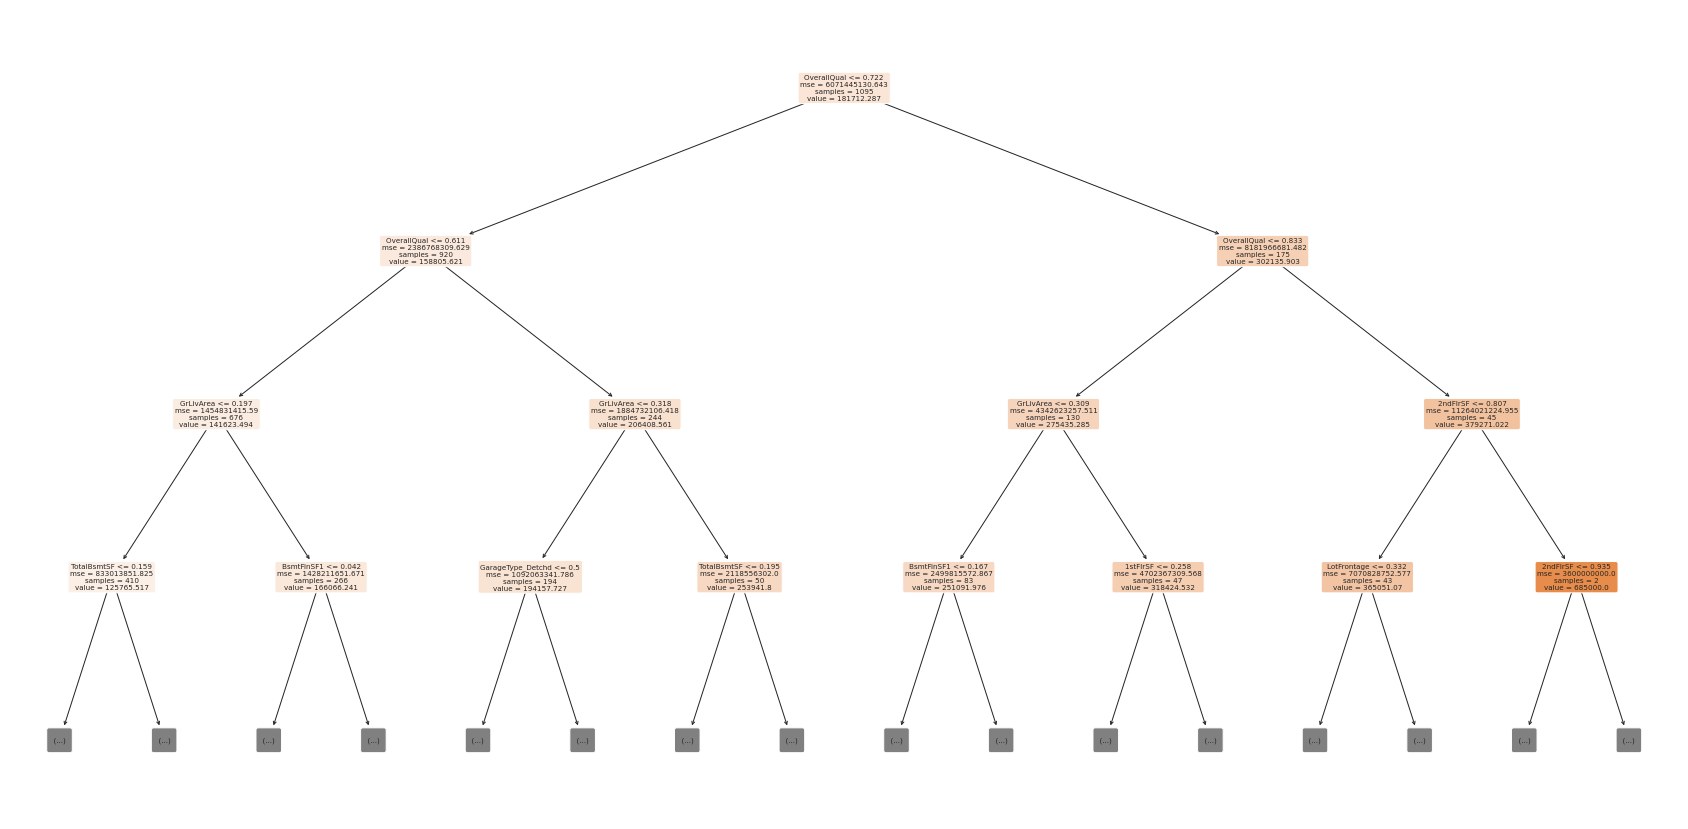

In [28]:
plt.figure(figsize=(30,15))

# Visualize the tree graphically using plot_tree
graph=plot_tree(tree,feature_names=train_inputs.columns.tolist(),max_depth=3,filled=True,rounded=True)

In [29]:
train_inputs.shape

(1095, 304)

In [30]:
# Visualize the tree textually using export_text
tree_text = export_text(tree,feature_names=train_inputs.columns.tolist(),max_depth=3)
print(tree_text[:1000])

|--- OverallQual <= 0.72
|   |--- OverallQual <= 0.61
|   |   |--- GrLivArea <= 0.20
|   |   |   |--- TotalBsmtSF <= 0.16
|   |   |   |   |--- truncated branch of depth 17
|   |   |   |--- TotalBsmtSF >  0.16
|   |   |   |   |--- truncated branch of depth 17
|   |   |--- GrLivArea >  0.20
|   |   |   |--- BsmtFinSF1 <= 0.04
|   |   |   |   |--- truncated branch of depth 16
|   |   |   |--- BsmtFinSF1 >  0.04
|   |   |   |   |--- truncated branch of depth 14
|   |--- OverallQual >  0.61
|   |   |--- GrLivArea <= 0.32
|   |   |   |--- GarageType_Detchd <= 0.50
|   |   |   |   |--- truncated branch of depth 17
|   |   |   |--- GarageType_Detchd >  0.50
|   |   |   |   |--- truncated branch of depth 11
|   |   |--- GrLivArea >  0.32
|   |   |   |--- TotalBsmtSF <= 0.19
|   |   |   |   |--- truncated branch of depth 10
|   |   |   |--- TotalBsmtSF >  0.19
|   |   |   |   |--- truncated branch of depth 9
|--- OverallQual >  0.72
|   |--- OverallQual <= 0.83
|   |   |--- GrLivArea <= 0.31
|  

In [31]:
# Display the first few lines
print(tree_text[:2000])

|--- OverallQual <= 0.72
|   |--- OverallQual <= 0.61
|   |   |--- GrLivArea <= 0.20
|   |   |   |--- TotalBsmtSF <= 0.16
|   |   |   |   |--- truncated branch of depth 17
|   |   |   |--- TotalBsmtSF >  0.16
|   |   |   |   |--- truncated branch of depth 17
|   |   |--- GrLivArea >  0.20
|   |   |   |--- BsmtFinSF1 <= 0.04
|   |   |   |   |--- truncated branch of depth 16
|   |   |   |--- BsmtFinSF1 >  0.04
|   |   |   |   |--- truncated branch of depth 14
|   |--- OverallQual >  0.61
|   |   |--- GrLivArea <= 0.32
|   |   |   |--- GarageType_Detchd <= 0.50
|   |   |   |   |--- truncated branch of depth 17
|   |   |   |--- GarageType_Detchd >  0.50
|   |   |   |   |--- truncated branch of depth 11
|   |   |--- GrLivArea >  0.32
|   |   |   |--- TotalBsmtSF <= 0.19
|   |   |   |   |--- truncated branch of depth 10
|   |   |   |--- TotalBsmtSF >  0.19
|   |   |   |   |--- truncated branch of depth 9
|--- OverallQual >  0.72
|   |--- OverallQual <= 0.83
|   |   |--- GrLivArea <= 0.31
|  

In [32]:
# Check feature importance
tree_importances = tree.feature_importances_

In [33]:
tree_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': tree_importances
}).sort_values('importance', ascending=False)

In [34]:
tree_importance_df

,feature,importance
3,OverallQual,0.632537
15,GrLivArea,0.104334
13,2ndFlrSF,0.031896
11,TotalBsmtSF,0.028504
12,1stFlrSF,0.026730
...,...,...
104,Condition2_RRAn,0.000000
103,Condition2_RRAe,0.000000
102,Condition2_PosN,0.000000
212,BsmtFinType2_nan,0.000000


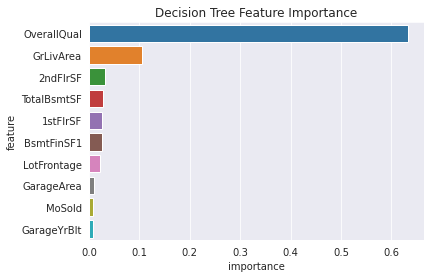

In [35]:
plt.title('Decision Tree Feature Importance')
sns.barplot(data=tree_importance_df.head(10), x='importance', y='feature');

Let's save our work before continuing.

In [37]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sahilfaizal/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sahilfaizal/python-random-forests-assignment


'https://jovian.ai/sahilfaizal/python-random-forests-assignment'

## Random Forests


> **QUESTION 4**: Train a random forest regressor using the training set.

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
# Create the model
rf1 = RandomForestRegressor(random_state=42,n_jobs=-1,n_estimators=50)

In [40]:
# Fit the model
rf1.fit(train_inputs,train_targets)

RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42)

**In the above random forest classifier example we have used the criterian as `mean squared error` and with 50 trees and all paraller operation**

Let's save our work before continuing.

In [41]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sahilfaizal/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sahilfaizal/python-random-forests-assignment


'https://jovian.ai/sahilfaizal/python-random-forests-assignment'

> **QUESTION 5**: Make predictions using the random forest regressor.

In [42]:
rf1_train_preds = rf1.predict(train_inputs)

In [43]:
rf1_train_rmse = mean_squared_error(train_targets,rf1_train_preds,squared=False)

In [44]:
rf1_val_preds = rf1.predict(val_inputs)

In [45]:
rf1_val_rmse = mean_squared_error(val_targets,rf1_val_preds,squared=False)

In [46]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf1_train_rmse, rf1_val_rmse))

Train RMSE: 12187.194095388446, Validation RMSE: 28168.66190663989


In [47]:
## Lets check the accuracy for the above random forest regressorsor 
accuracy_rf1_train=rf1.score(train_inputs,train_targets)
accuracy_rf1_val=rf1.score(val_inputs,val_targets)
print('The accuracy for train model is {:.4f}% \n The accuracy for validation model is {:.4f} %'.format(accuracy_rf1_train*100,accuracy_rf1_val*100))

The accuracy for train model is 97.5537% 
 The accuracy for validation model is 88.6733 %


**Interpretation**
- Due to more number of trees and with each tree having different random hypermparamater the random forest classifier generalize the training data more instead of the learning and hence we cans see there is a drastic increase in the accuracy of the validation set'.

- Due to more randomisation in the selectio of data we get the accuracy for the validation set more and hence reduces teh overfitting.

- We can also reduces teh overfitting doing some more changes in teh number of hyper-paramaters

- Tree classifier accuracy : Training set : 100 % | validation =0.27%
- Randome Forest accuracy  : Training set : 97.55 % | validation =86.67%

Let's save our work before continuing.

In [48]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sahilfaizal/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sahilfaizal/python-random-forests-assignment


'https://jovian.ai/sahilfaizal/python-random-forests-assignment'

## Hyperparameter Tuning

Let us now tune the hyperparameters of our model. You can find the hyperparameters for `RandomForestRegressor` here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

Hyperparameters are use

Let's define a helper function `test_params` which can test the given value of one or more hyperparameters.

In [49]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

It can be used as follows:

In [50]:
test_params(n_estimators=20, max_depth=20)

(13776.89957127333, 28886.033523273858)

In [51]:
test_params(n_estimators=50, max_depth=10, min_samples_leaf=4, max_features=0.4)

(20490.359632429263, 29804.931642791606)

Let's also define a helper function to test and plot different values of a single parameter.

In [52]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

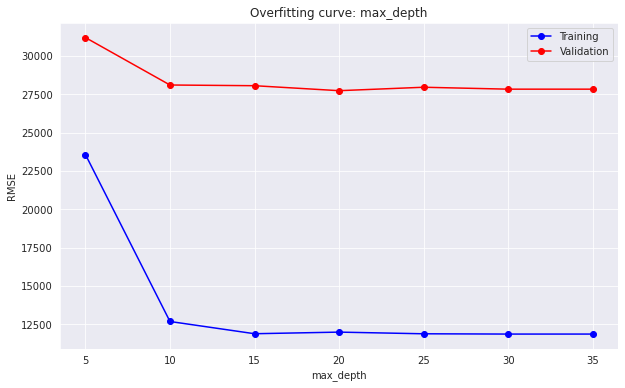

In [53]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

From the above graph, it appears that the best value for `max_depth` is around 20, beyond which the model starts to overfit.

Let's save our work before continuing.

In [54]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sahilfaizal/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sahilfaizal/python-random-forests-assignment


'https://jovian.ai/sahilfaizal/python-random-forests-assignment'

> **QUESTION 6**: Use the `test_params` and `test_param_and_plot` functions to experiment with different values of the  hyperparmeters like `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `min_weight_fraction_leaf`, `max_features`, `max_leaf_nodes`, `min_impurity_decrease`, `min_impurity_split` etc. You can learn more about the hyperparameters here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

#### 1. **Lets us try the test_params_and_plot function to check the error for the hyper parameter number of tress i.e. `n_estimators` with from teh range of 10 to 600 with increment of 20.**

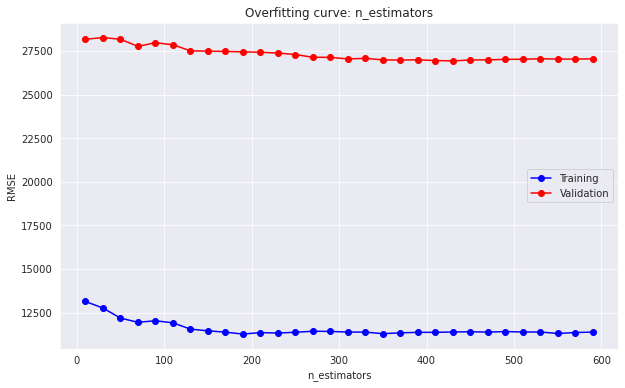

In [55]:
## Lets test our test_params and test_param_and_plot for other hyper parametrs 
range=[]
i=10
while i< 600 :
  range.append(i)
  i=i+20


test_param_and_plot('n_estimators',range)

**Checking more closely between 380 to 410**

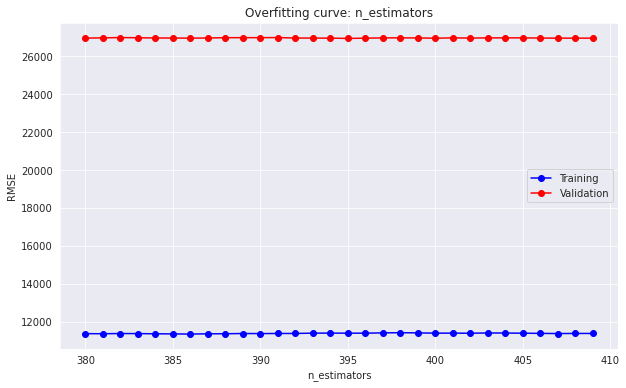

In [56]:
test_param_and_plot('n_estimators',np.arange(380,410,1))

> **Interpretation**
- Hence from the above one can observe that on n_estimators it is difficult to find the overfitting point and however by checking it minutely one can say at approx at 406 no. of tress ..

#### 2. **Lets check it with the help of `max_samples` hyperparamter when do we get the optimal value for it for range of fraction from 0.1 to 0.9**

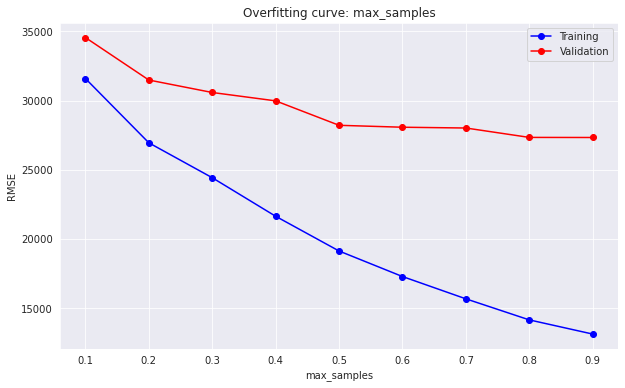

In [57]:
test_param_and_plot('max_samples',np.arange(0.1,1,0.1))

> **Interpretation**
- *Hence from the above one can observe that at around 0.8 fraction of total samples one can see the least error*

#### 3. **Lets check it with the help of `max_features` hyperparamter when do we get the optimal value for it for range of fraction from 0.1 to 0.9**

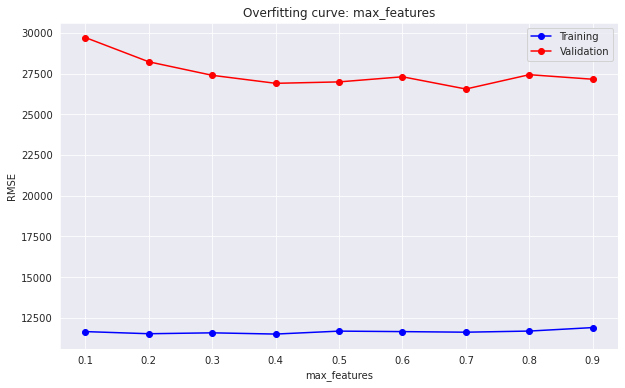

In [59]:
test_param_and_plot('max_features',np.arange(0.1,1,0.1))

> **Interpretation**
- Hence from the above one can observe that at 0.7 fraction of total features one can see slight overfit in `max_features` hyprparameter.

#### 4. **Lets check it with the help of `min_samples_leaf` hyperparamter when do we get the optimal value for it for range of 1 to 2^9. It is used as it is having the of smoothing the model, especially in regression.**


In [60]:
train_inputs.shape

(1095, 304)

We will do teh range of min_samples_leaf from 1 to 1024 i.e 2**10

In [61]:
data=[]
i=0
while (i <10):
  data.append(2**i)
  i=i+1

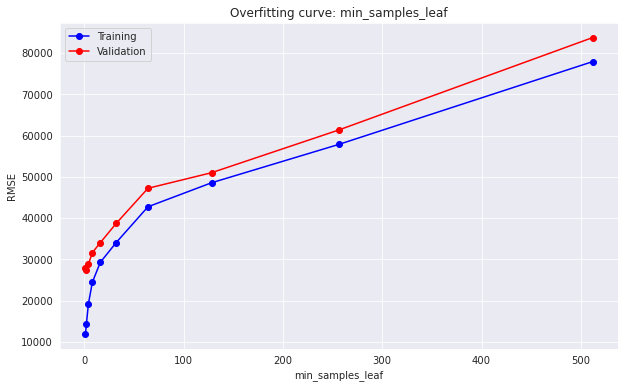

In [62]:
test_param_and_plot('min_samples_leaf',data)

> **Interepretation**

1. Hence it can seen at around the 120 to 130 we get the least difference between the training and validation set so one can say that it is the best values for min_sample_leaf.

2. Only we can say as the min_samples_leaf is decreasing the accuarcy is increasing and hence the error is decreasing . 
3. Which is intuitive as the node will split only when the corresponding mininum samples it will contain and hence as the power of 2 increases the nodel splits at very higher levels and dont get generalizes very well and hence error increases. 
4. Also it can be seen as the min_samples_leaf increase till 80 the error is paroabolic and after that it is linear. 

#### 5. **min_impurity_decrease**: A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

Lets check for the min_impurity_decrease hyperparameters

In [63]:
range =[]
i=0
while (i<13):
  range.append(pow(10,-i))
  i=i+1
range

[1,
 0.1,
 0.01,
 0.001,
 0.0001,
 1e-05,
 1e-06,
 1e-07,
 1e-08,
 1e-09,
 1e-10,
 1e-11,
 1e-12]

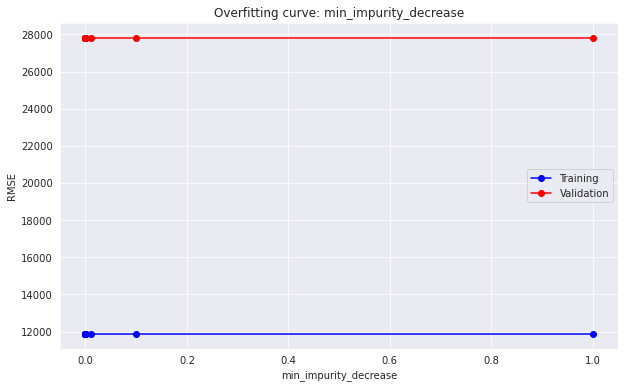

In [64]:
test_param_and_plot('min_impurity_decrease',range)

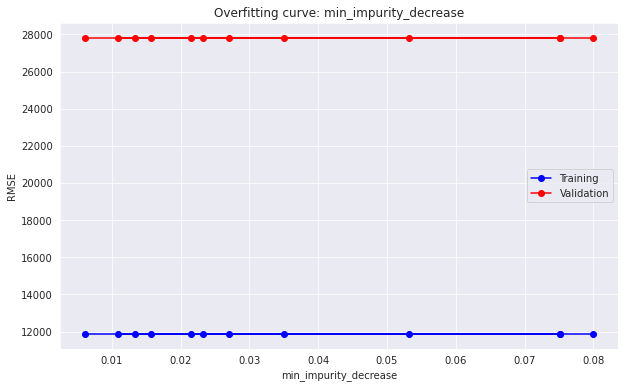

In [65]:
test_param_and_plot('min_impurity_decrease',(np.random.rand(12)*pow(10,-1)))

**Interpretation**

- One can see there is no change in the rmse error of validation and training model by changing the values of Min_impurity _decrease.** 
Strange

#### 6.`min_samples_split`: The minimum number of samples required to split an internal node:


In [66]:
train_inputs.shape

(1095, 304)

Let us make the min_samples_split range from 2 to 200 with increment of 10.

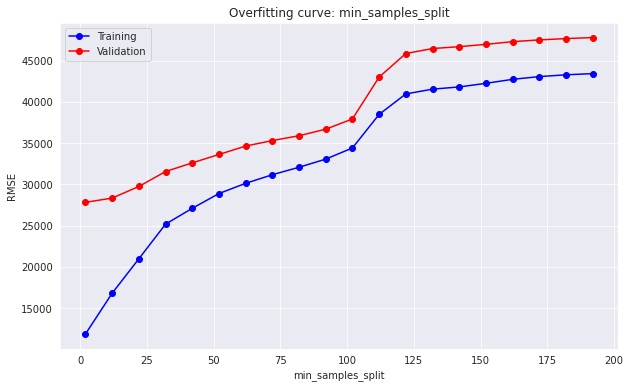

In [67]:
test_param_and_plot('min_samples_split',np.arange(2,200,10))

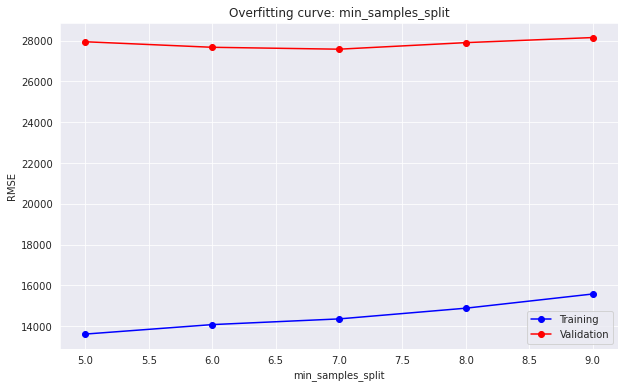

In [68]:
test_param_and_plot('min_samples_split',np.arange(5,10,1))

**Interpretation**

- As we can see the rmse for both set is minimum when the `min_samples_split`  is minimum i.e 2.

- However for selecting the best option for our hyperparameter we want the option which provide less difference in the error so here one can say that between 100 to 110 of `min_samples_split`.

#### 7.`max_leaf_nodes`: 

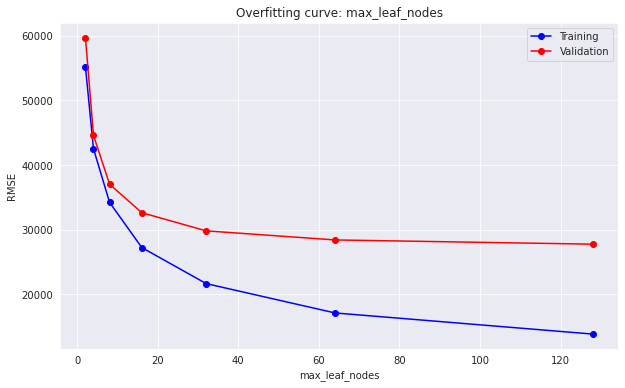

In [69]:
## Plotting the range of max_leaf_nodes in the power of 2
range=[]
i=1
while i< 8:
  range.append(2**i)
  i=i+1

test_param_and_plot('max_leaf_nodes',range)

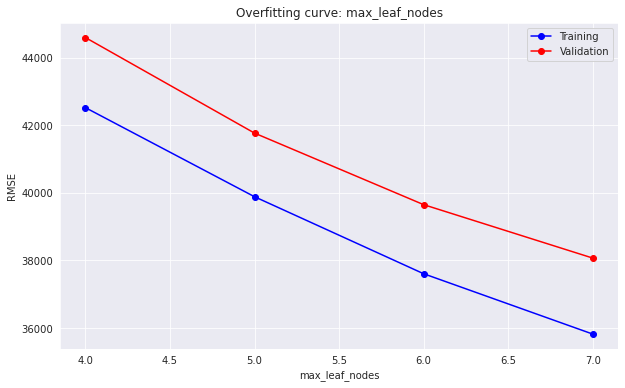

In [70]:
## One can see the very least difference in error at around 4 to 7 max_leaf_nodes . Lets check .
test_param_and_plot('max_leaf_nodes',[4,5,6,7])

**Best Option for it is i.e 5 as it seems to have least difference.**

#### 8. `min_weight_fraction_leaf` : 

The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

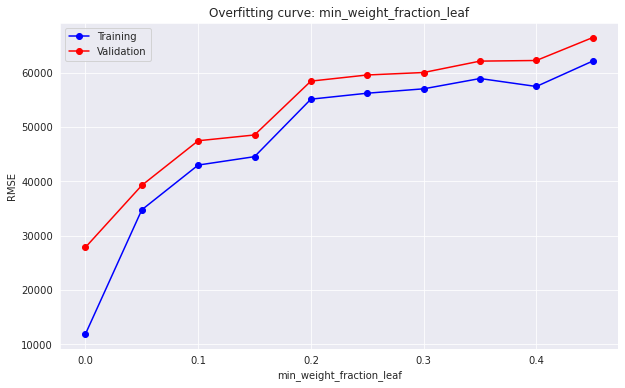

In [71]:
test_param_and_plot('min_weight_fraction_leaf',np.arange(0,0.5,0.05))

**Interepretation**
As it can be seen from the above the error difference is least at around 0.2.

#### 9.`min_impurity_split`

In [72]:
data=[]
while i <10:
  data.append(pow(10,i))
  i=i+1

In [73]:
import warnings
warnings.filterwarnings("ignore")

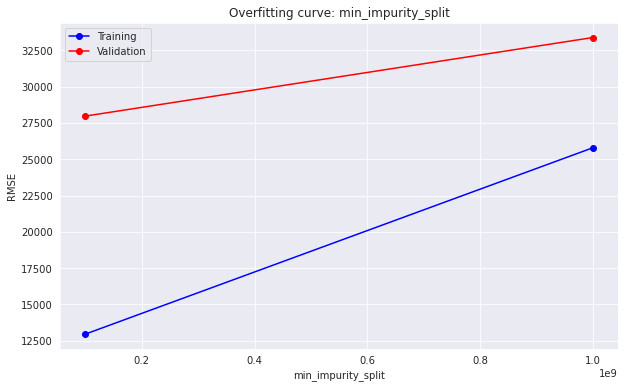

In [74]:
test_param_and_plot('min_impurity_split',data);

**Interpretation**

**Around 0.1 it is having the least error for validation data set**

#### 10. **Lets try for `max_depth` again** 

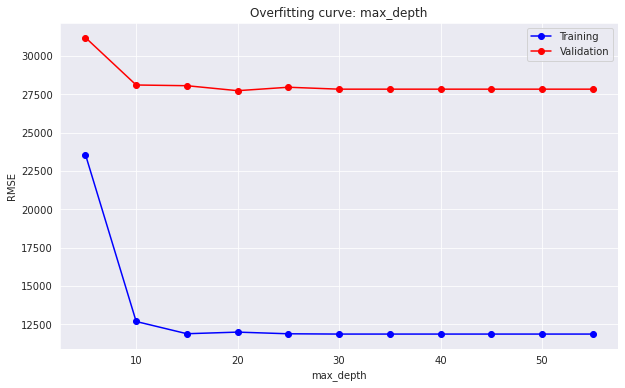

In [75]:
test_param_and_plot('max_depth',np.arange(5,60,5))

**Interpretation**
Getting the same overfit point at aroung 20 max_depth.

In [76]:
## LEst see some impuritie sand complex pruning 
clf=DecisionTreeRegressor(random_state=42)

In [77]:
path=clf.cost_complexity_pruning_path(train_inputs,train_targets)

In [78]:
alphas,impurity=path.ccp_alphas,path.impurities

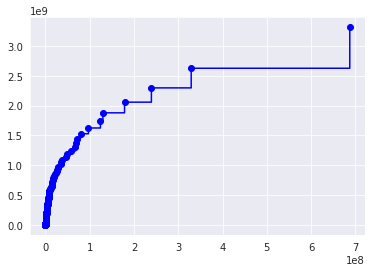

In [79]:
## We dont take last effective alpha as it ih the trivila tree having only one nodes 
plt.plot(alphas[:-1],impurity[:-1],'bo-',drawstyle='steps-post')

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
clfs = []
for ccp_alpha in alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(train_inputs, train_targets)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 2758503565.23836


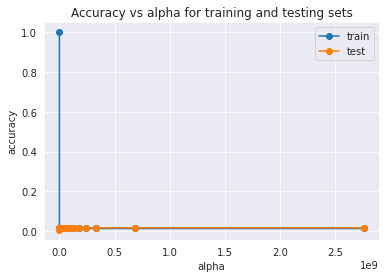

In [82]:
train_scores = [clf.score(train_inputs, train_targets) for clf in clfs]
test_scores = [clf.score(val_inputs,val_targets) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

Let's save our work before continuing.

In [83]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sahilfaizal/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sahilfaizal/python-random-forests-assignment


'https://jovian.ai/sahilfaizal/python-random-forests-assignment'

From the above,analysing each hyper parameters we can conclude for teh best model as :
1. n_estimators=400
2. max_samples=0.8
3. max_features=0.7
4. min_samples_leaf= default
5. min_impurity_decrease=default
6. min_samples_split= default
7. min_weight_fraction_leaf=0 or default
8. min_impurity_split =0.1

## Training the Best Model

> **QUESTION 7**: Train a random forest regressor model with your best hyperparameters to minimize the validation loss.

In [84]:
# Create the model with custom hyperparameters
rf2 = RandomForestRegressor(n_estimators=400,max_samples=0.8,max_features=0.7,min_impurity_split=0.1,random_state=42)

In [130]:
# Train the model
rf2.fit(train_inputs,train_targets)

RandomForestRegressor(max_features=0.7, max_samples=0.8, min_impurity_split=0.1,
                      n_estimators=400, random_state=42)

Let's save our work before continuing.

In [86]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sahilfaizal/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sahilfaizal/python-random-forests-assignment


'https://jovian.ai/sahilfaizal/python-random-forests-assignment'

> **QUESTION 8**: Make predictions and evaluate your final model. If you're unhappy with the results, modify the hyperparameters above and try again.

In [87]:
rf2_train_preds = rf2.predict(train_inputs)

In [88]:
rf2_train_rmse = mean_squared_error(train_targets,rf2_train_preds,squared=False)

In [89]:
rf2_val_preds = rf2.predict(val_inputs)

In [90]:
rf2_val_rmse = mean_squared_error(val_targets,rf2_val_preds,squared=False)

In [91]:
print('Train RMSE: {}, Validation RMSE: {}'.format(rf2_train_rmse, rf2_val_rmse))

Train RMSE: 13794.981368133998, Validation RMSE: 27204.95428435639


In [95]:
error=rf2_train_rmse-rf2_val_rmse
error

-13409.972916222392

**Accuracy**

In [96]:
## Lets check the accuracy 
rf2_train_acc=rf2.score(train_inputs,train_targets)
rf2_val_acc=rf2.score(val_inputs,val_targets)
print('The accuracy of train model is {:.4f}% \n and vaidation model is {:.4f}% '.format(rf2_train_acc*100,rf2_val_acc*100))

The accuracy of train model is 96.8656% 
 and vaidation model is 89.4350% 


**Conclusion**

In [97]:
column=['model','train_score','val_score']

In [98]:
conclusion_df=pd.DataFrame({'model':['Decision tree','Random_Forest_wo_best_option','Random_Forest_w_best_option'],
              'train_score':[accuracy_train,accuracy_rf1_train,rf2_train_acc],
              'val_score':[accuracy_val,accuracy_rf1_val,rf2_val_acc]})
conclusion_df

,model,train_score,val_score
0,Decision tree,1.000000,0.002740
1,Random_Forest_wo_best_option,0.975537,0.886733
2,Random_Forest_w_best_option,0.968656,0.894350


**Result**

1. Hence it can be seen that with the help of best selcection in hyperparameters we have got the accuracy in validation set 0.8% more as compared to `Random Forest Regressor` without best option which is very significant .

2. The model created by Decision tree seems to be very poor as it was unable to generlises teh validation data hence it was highly overfit.

3. However when we compare the random classifier with and without best option on ecan say that best option was more better and generalises well teh validation set.

Let's also view and plot the feature importances.

In [99]:
rf2_importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': rf2.feature_importances_
}).sort_values('importance', ascending=False)

In [100]:
rf2_importance_df

,feature,importance
3,OverallQual,4.406524e-01
15,GrLivArea,1.256862e-01
25,GarageCars,5.809295e-02
11,TotalBsmtSF,3.379447e-02
5,YearBuilt,3.137269e-02
...,...,...
284,MiscFeature_Gar2,1.228392e-09
105,Condition2_RRNn,0.000000e+00
101,Condition2_PosA,0.000000e+00
127,RoofMatl_Membran,0.000000e+00


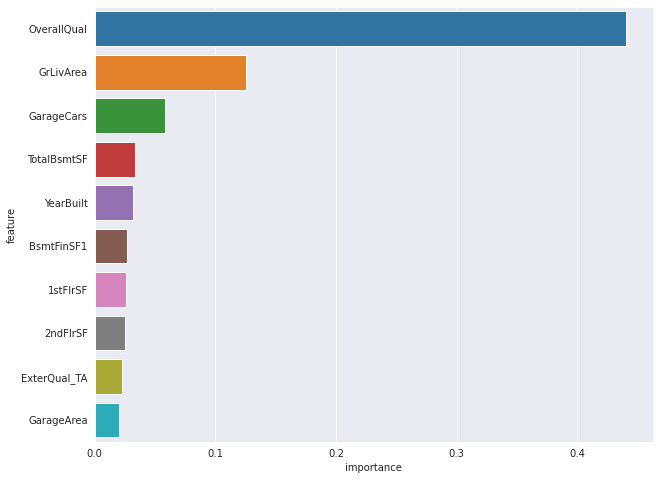

In [101]:
plt.figure(figsize=(10,8))
sns.barplot(data=rf2_importance_df.head(10), x='importance', y='feature');

**Interpretation**

1. As intuited `OverallQual`(Overall material and finish quality) parameters influences the most in estimating the sales price of house .

2. `GrLivArea`(Above grade (ground) living area square feet) seems to be second most influential factor for sale price ,

3. Similarly `GarageCars`(Size of garage in car capacity) also play a critical role in slae price.

4. All the other remaining parametes also seems to have their slight part in sale price .

Let's save our work before continuing.

In [102]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sahilfaizal/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sahilfaizal/python-random-forests-assignment


'https://jovian.ai/sahilfaizal/python-random-forests-assignment'

In [121]:
rf2 = RandomForestRegressor(n_estimators=400,max_samples=0.8,max_features=0.7,min_impurity_split=0.1,random_state=42)

In [122]:
rf3=RandomForestRegressor(n_estimators=400,max_samples=0.8,max_features=0.7,max_leaf_nodes=128,max_depth=20,min_impurity_split=0.1,min_samples_split=7,random_state=42)

In [123]:
## fitting the model we have 
rf3.fit(train_inputs,train_targets)

RandomForestRegressor(max_depth=20, max_features=0.7, max_leaf_nodes=128,
                      max_samples=0.8, min_impurity_split=0.1,
                      min_samples_split=7, n_estimators=400, random_state=42)

## Make a Submission

To make a submission, just execute the following cell:

In [108]:
jovian.submit('zerotogbms-a2')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sahilfaizal/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sahilfaizal/python-random-forests-assignment
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/assignment-2-decision-trees-and-random-forests


You can also submit your Jovian notebook link on the assignment page: https://jovian.ai/learn/machine-learning-with-python-zero-to-gbms/assignment/assignment-2-decision-trees-and-random-forests

Make sure to review the evaluation criteria carefully. You can make any number of submissions, and only your final submission will be evalauted.

Ask questions, discuss ideas and get help here: https://jovian.ai/forum/c/zero-to-gbms/gbms-assignment-2/99

NOTE: **The rest of this assignment is optional.**

## Making Predictions on the Test Set

Let's make predictions on the test set provided with the data.

In [124]:
test_df = pd.read_csv('house-prices/test.csv')

In [125]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

First, we need to reapply all the preprocessing steps.

In [126]:
test_df[numeric_cols] = imputer.transform(test_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])
test_df[encoded_cols] = encoder.transform(test_df[categorical_cols])

In [127]:
test_inputs = test_df[numeric_cols + encoded_cols]

We can now make predictions using our final model.

In [131]:
test_preds = rf2.predict(test_inputs)

In [132]:
submission_df = pd.read_csv('house-prices/sample_submission.csv')

In [133]:
submission_df

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


Let's replace the values of the `SalePrice` column with our predictions.

In [134]:
submission_df['SalePrice'] = test_preds

Let's save it as a CSV file and download it.

In [135]:
submission_df.to_csv('submission.csv', index=False)

In [136]:
from IPython.display import FileLink
FileLink('submission.csv') # Doesn't work on Colab, use the file browser instead to download the file.

/home/jovyan/submission.csv

We can now submit this file to the competition: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/submissions

![](https://i.imgur.com/6h2vXRq.png)


> **(OPTIONAL) QUESTION**: Submit your predictions to the competition. Experiment with different models, feature engineering strategies and hyperparameters and try to reach the top 10% on the leaderboard.

Let's save our work before continuing.

In [137]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "sahilfaizal/python-random-forests-assignment" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/sahilfaizal/python-random-forests-assignment


'https://jovian.ai/sahilfaizal/python-random-forests-assignment'

### Making Predictions on Single Inputs

In [138]:
def predict_input(model, single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols].values)
    return model.predict(input_df[numeric_cols + encoded_cols])[0]

In [139]:
sample_input = { 'MSSubClass': 20, 'MSZoning': 'RL', 'LotFrontage': 77.0, 'LotArea': 9320,
 'Street': 'Pave', 'Alley': None, 'LotShape': 'IR1', 'LandContour': 'Lvl', 'Utilities': 'AllPub',
 'LotConfig': 'Inside', 'LandSlope': 'Gtl', 'Neighborhood': 'NAmes', 'Condition1': 'Norm', 'Condition2': 'Norm',
 'BldgType': '1Fam', 'HouseStyle': '1Story', 'OverallQual': 4, 'OverallCond': 5, 'YearBuilt': 1959,
 'YearRemodAdd': 1959, 'RoofStyle': 'Gable', 'RoofMatl': 'CompShg', 'Exterior1st': 'Plywood',
 'Exterior2nd': 'Plywood', 'MasVnrType': 'None','MasVnrArea': 0.0,'ExterQual': 'TA','ExterCond': 'TA',
 'Foundation': 'CBlock','BsmtQual': 'TA','BsmtCond': 'TA','BsmtExposure': 'No','BsmtFinType1': 'ALQ',
 'BsmtFinSF1': 569,'BsmtFinType2': 'Unf','BsmtFinSF2': 0,'BsmtUnfSF': 381,
 'TotalBsmtSF': 950,'Heating': 'GasA','HeatingQC': 'Fa','CentralAir': 'Y','Electrical': 'SBrkr', '1stFlrSF': 1225,
 '2ndFlrSF': 0, 'LowQualFinSF': 0, 'GrLivArea': 1225, 'BsmtFullBath': 1, 'BsmtHalfBath': 0, 'FullBath': 1,
 'HalfBath': 1, 'BedroomAbvGr': 3, 'KitchenAbvGr': 1,'KitchenQual': 'TA','TotRmsAbvGrd': 6,'Functional': 'Typ',
 'Fireplaces': 0,'FireplaceQu': np.nan,'GarageType': np.nan,'GarageYrBlt': np.nan,'GarageFinish': np.nan,'GarageCars': 0,
 'GarageArea': 0,'GarageQual': np.nan,'GarageCond': np.nan,'PavedDrive': 'Y', 'WoodDeckSF': 352, 'OpenPorchSF': 0,
 'EnclosedPorch': 0,'3SsnPorch': 0, 'ScreenPorch': 0, 'PoolArea': 0, 'PoolQC': np.nan, 'Fence': np.nan, 'MiscFeature': 'Shed',
 'MiscVal': 400, 'MoSold': 1, 'YrSold': 2010, 'SaleType': 'WD', 'SaleCondition': 'Normal'}

In [140]:
predicted_price = predict_input(rf2, sample_input)

In [141]:
print('The predicted sale price of the house is ${}'.format(predicted_price))

The predicted sale price of the house is $124474.125


> **EXERCISE**: Change the sample input above and make predictions. Try different examples and try to figure out which columns have a big impact on the sale price. Hint: Look at the feature importance to decide which columns to try.

### Saving the Model

In [142]:
import joblib

In [143]:
house_prices_rf = {
    'model': rf2,
    'imputer': imputer,
    'scaler': scaler,
    'encoder': encoder,
    'input_cols': input_cols,
    'target_col': target_col,
    'numeric_cols': numeric_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}

In [144]:
joblib.dump(house_prices_rf, 'house_prices_rf.joblib')

['house_prices_rf.joblib']

Let's save our work before continuing.

In [ ]:
jovian.commit(outputs=['house_prices_rf.joblib'])

<IPython.core.display.Javascript object>

### Predicting the Logarithm of Sale Price

> **(OPTIONAL) QUESTION**: In the [original Kaggle competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview/evaluation), the model is evaluated by computing the Root Mean Squared Error on the logarithm of the sale price. Try training a random forest to predict the logarithm of the sale price, instead of the actual sales price and see if the results you obtain are better than the models trained above.